In [ ]:
#References
#https://iq.opengenus.org/applications-of-autoencoders/
#https://www.kaggle.com/code/shivamb/how-autoencoders-work-intro-and-usecases
#https://www.kaggle.com/code/parulpandey/visualizing-kannada-mnist-with-t-sne/notebook#

Implementing an AutoEncoder for the MINST dataset 

In [ ]:
#Buiding and Autoencoder for the  MINST dataset
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#Read Dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

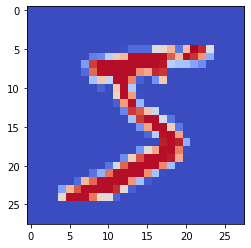

In [ ]:
#check first image on training data
plt.imshow(x_train[0], cmap = 'coolwarm')
plt.show()


In [ ]:
# flatten a 2D image into a 1D vector. 
x_train = np.reshape(x_train, (-1, 784))
x_test = np.reshape(x_train, (-1, 784))

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
#Creating  encoder
encoder = tf.keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu')
])

In [ ]:
#Creating decoder
decoder = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(32,)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(784, activation='sigmoid')
])

In [ ]:
#Buiding the autoencoder
model = tf.keras.Sequential([encoder,decoder])
model.compile("nadam", loss = "binary_crossentropy")

In [ ]:
#Get model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32)                576480    
                                                                 
 sequential_1 (Sequential)   (None, 784)               577232    
                                                                 
Total params: 1,153,712
Trainable params: 1,153,712
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
callbacks = [keras.callbacks.EarlyStopping(patience=2)] #added early stopping to stop the training when loss does not decrease anymore
model.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                #validation_data=(x_test, x_test),
                validation_split=.1,
                callbacks = callbacks)

Epoch 1/50
211/211 [==============================] - 16s 77ms/step - loss: 0.2366 - val_loss: 0.2672
Epoch 2/50
211/211 [==============================] - 15s 73ms/step - loss: 0.2348 - val_loss: 0.2667
Epoch 3/50
211/211 [==============================] - 15s 71ms/step - loss: 0.2329 - val_loss: 0.2684
Epoch 4/50
211/211 [==============================] - 16s 74ms/step - loss: 0.2312 - val_loss: 0.2685
Epoch 5/50
211/211 [==============================] - 15s 71ms/step - loss: 0.2296 - val_loss: 0.2659
Epoch 6/50
211/211 [==============================] - 15s 71ms/step - loss: 0.2279 - val_loss: 0.2659
Epoch 7/50
211/211 [==============================] - 17s 79ms/step - loss: 0.2270 - val_loss: 0.2666
Epoch 8/50
211/211 [==============================] - 19s 88ms/step - loss: 0.2261 - val_loss: 0.2667
Epoch 9/50
211/211 [==============================] - 15s 72ms/step - loss: 0.2253 - val_loss: 0.2699
Epoch 10/50
211/211 [==============================] - 15s 73ms/step - loss: 0.224

In [ ]:
#Generate a prediction on model data 
predict = model.predict(x_test)

print(predict.shape)
#(60000, 28, 28)




1875/1875 [==============================] - 11s 6ms/step
(60000, 784)


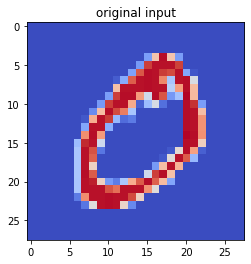

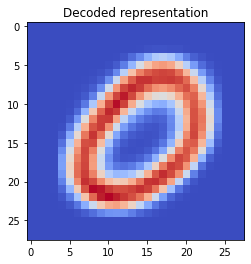

In [ ]:
og = np.reshape(x_test[1], (28,28))
test = np.reshape(predict[1], (28,28))

plt.imshow(og, cmap = 'coolwarm')
plt.title("original input")
plt.show()
plt.imshow(test, cmap = 'coolwarm')
plt.title("Decoded representation")
plt.show()

How do AutoEncoders Work?

In [ ]:

# Autoencoders work by making the output the same as the input . An autoencoder is a regression task where the network is asked to predict its input \
#(in other words, model the identity function). 
#These networks has a tight bottleneck of a few neurons in the middle, 
#forcing them to create effective representations that compress the input into a low-dimensional code that can be used by the decoder to reproduce the original input.
#The Encoder is a function f that compresses the input into a latent-space representation. f(x) = h
#The Decoder is a a function g that reconstruct the input from the latent space representation. g(h) ~ x.
#A highly fine tuned autoencoder model should be able to reconstruct the same input which was passed in the first layer.
#A typical autoencoder architecture comprises of three main components:

#Encoding Architecture : The encoder architecture comprises of series of layers with decreasing number of nodes and ultimately reduces to a latent view repersentation.
#Latent View Repersentation : Latent view repersents the lowest level space in which the inputs are reduced and information is preserved.
#Decoding Architecture : The decoding architecture is the mirror image of the encoding architecture but in which number of nodes in every layer increases and ultimately outputs the similar (almost) input.

Uses of AutoEncoders

In [ ]:
# Dimensionality Reduction
# Image Compression
# Image Denoising
# Feature Extraction
# Image generation
# Sequence to sequence prediction
# Recommendation system

Visualizing the embedding of the autoencoder using TSNE

In [ ]:
#reduce dimensionality
from sklearn.manifold import TSNE
embeddings = encoder.predict(x_test)
tsne = TSNE(n_components=2, verbose=0, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

1875/1875 [==============================] - 6s 3ms/step


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


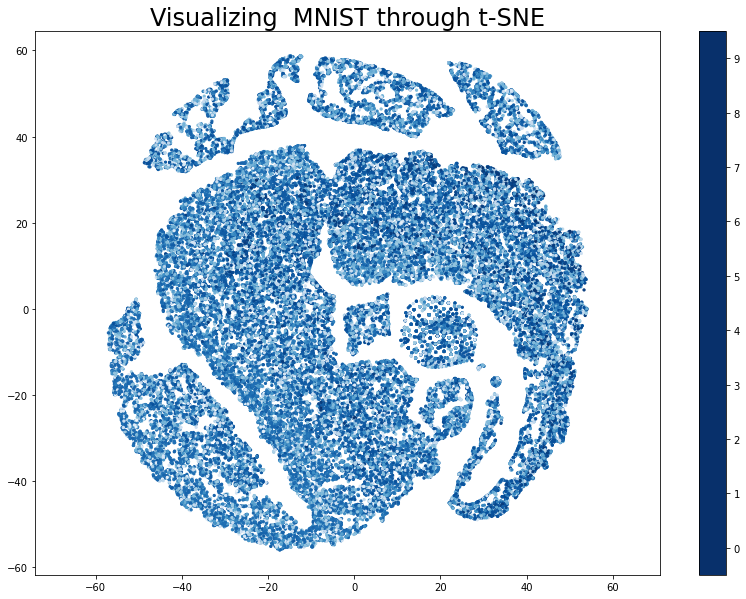

In [ ]:
#Vizualize the embeddings
plt.figure(figsize=(14,10))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s= 5, c=np.argmax(x_test, axis=1), cmap='Blues_r')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing  MNIST through t-SNE', fontsize=24);